Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 105ms/step - accuracy: 0.2387 - loss: 1.9098 - val_accuracy: 0.1024 - val_loss: 3.7568
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 108ms/step - accuracy: 0.3615 - loss: 1.4495 - val_accuracy: 0.2118 - val_loss: 3.1561
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 135s 101ms/step - accuracy: 0.3929 - loss: 1.3775 - val_accuracy: 0.2055 - val_loss: 4.2262
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 103ms/step - accuracy: 0.4063 - loss: 1.3552 - val_accuracy: 0.2743 - val_loss: 4.5381
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 137s 98ms/step - accuracy: 0.4045 - loss: 1.4071 - val_accuracy: 0.2543 - val_loss: 10.1689


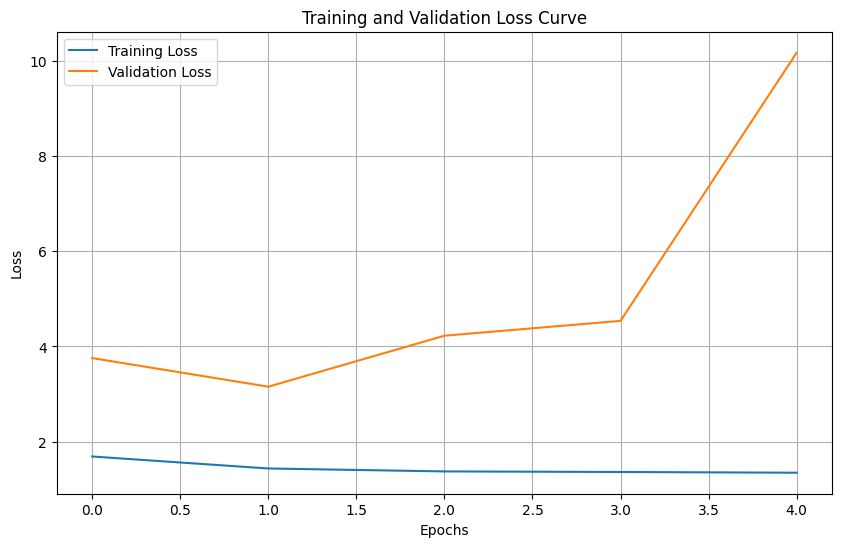

In [ ]:
# DROPOUT REGULARIZATION
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.astype('float32')/255.0  # --> normalize the data
xtext = xtest.astype('float32')/255.0
xtrain = xtrain.reshape(-1, 28*28)  # --> flatten the images to 1d vectors
xtest = xtest.reshape(-1, 28*28)
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dropout(0.5))
for i in range(9):  # --> 10 hidden layers in total
  model.add(layers.Dense(512, activation = 'relu'))
  model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(xtrain, ytrain, epochs = 5, batch_size = 64, validation_data = (xtest, ytest))
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 64ms/step - accuracy: 0.3003 - loss: 1.8100 - val_accuracy: 0.4722 - val_loss: 90.9015
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.7368 - loss: 0.7992 - val_accuracy: 0.7507 - val_loss: 40.5764
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.8414 - loss: 0.5945 - val_accuracy: 0.8388 - val_loss: 18.5605
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.8813 - loss: 0.4913 - val_accuracy: 0.8488 - val_loss: 25.8041
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9056 - loss: 0.4147 - val_accuracy: 0.8559 - val_loss: 22.9265
Restoring model weights from the end of the best epoch: 3.


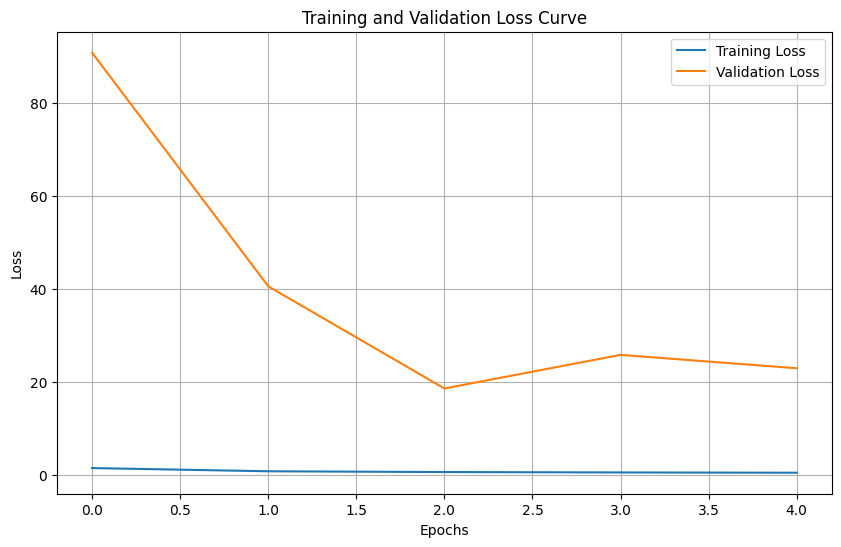

In [ ]:
# EARLY STOPPING REGULARIZATION
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.astype('float32')/255.0  # --> normalize the data
xtext = xtest.astype('float32')/255.0
xtrain = xtrain.reshape(-1, 28*28)  # --> flatten the images to 1d vectors
xtest = xtest.reshape(-1, 28*28)
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dropout(0.5))
for i in range(9):  # --> 10 hidden layers in total
  model.add(layers.Dense(512, activation = 'relu'))
  model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
# UP TILL HERE, EVERYTHING IS THE SAME AS DROPOUT
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True, verbose = 1)
history = model.fit(xtrain, ytrain, epochs = 5, batch_size = 64, validation_data = (xtest, ytest), callbacks = [earlystopping])
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 62ms/step - accuracy: 0.2752 - loss: 1.8431 - val_accuracy: 0.3710 - val_loss: 66.4692
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.6795 - loss: 0.8738 - val_accuracy: 0.6787 - val_loss: 44.1561
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.7913 - loss: 0.6226 - val_accuracy: 0.7571 - val_loss: 31.7310
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.8441 - loss: 0.5194 - val_accuracy: 0.8479 - val_loss: 23.6480
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.8950 - loss: 0.4434 - val_accuracy: 0.8559 - val_loss: 26.0021


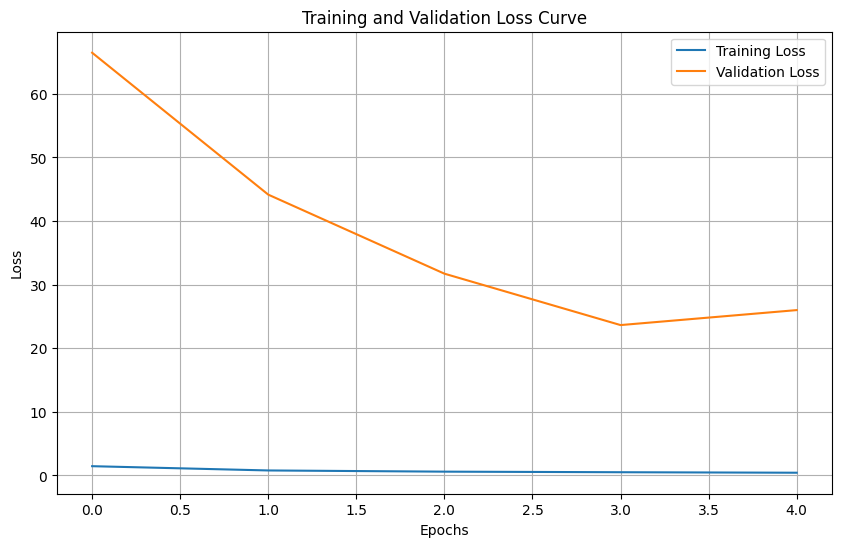

In [ ]:
# GRADIENT CLIPPING REGULARIZATION
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.astype('float32')/255.0  # --> normalize the data
xtext = xtest.astype('float32')/255.0
xtrain = xtrain.reshape(-1, 28*28)  # --> flatten the images to 1d vectors
xtest = xtest.reshape(-1, 28*28)
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dropout(0.5))
for i in range(9):  # --> 10 hidden layers in total
  model.add(layers.Dense(512, activation = 'relu'))
  model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
optimizer = Adam(clipvalue = 1.0)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(xtrain, ytrain, epochs = 5, batch_size = 64, validation_data = (xtest, ytest))
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()